In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data Injection

In [6]:
df = pd.read_csv('/content/kidney_disease.csv')

In [7]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [10]:
df.shape

(400, 26)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [12]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [13]:
df.duplicated().sum()

0

In [14]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [15]:
# id columns does not make much sense so you can drop this column

In [16]:
df.drop('id', axis = 1, inplace = True) # always drop id in any eda

In [17]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [18]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [19]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [20]:
# statistics
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [23]:
df.dtypes

,0
age,float64
blood_pressure,float64
specific_gravity,float64
albumin,float64
sugar,float64
red_blood_cells,object
pus_cell,object
pus_cell_clumps,object
bacteria,object
blood_glucose_random,float64


In [24]:
# white blood and red blood count is object why ?

In [25]:
# packed cell volume
df['packed_cell_volume']

,packed_cell_volume
0,44
1,38
2,31
3,32
4,35
...,...
395,47
396,54
397,49
398,51


In [26]:
# why packed cell volume is object column
# there might be some missing values
df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [ ]:
# due to some string values in the column it is an object
# still you want to convert to numeric value

In [27]:
# there is a way
# this time different way
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors = 'coerce') # meaing ignore or supress

In [28]:
df['packed_cell_volume'].dtype

dtype('float64')

In [29]:
df['packed_cell_volume'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [30]:
# because all string character is converted to nan value

In [ ]:
# in the previous eda ou were using str.replace()

In [31]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [34]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors = 'coerce')

In [35]:
df['white_blood_cell_count'].dtype

dtype('float64')

In [36]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors = 'coerce')

In [37]:
df['red_blood_cell_count'].dtype

dtype('float64')

In [ ]:
# seperate the categorical and numeric column

In [ ]:
# EDA
# this time seperate in different way

In [40]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']

In [41]:
num_col = [col for col in df.columns if df[col].dtype != 'object']

In [42]:
cat_col

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [43]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [ ]:
# fro catwgorical coumns we can see unique values

In [44]:
for col in cat_col:
  print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [46]:
# another way to replace
df['diabetes_mellitus'].replace(to_replace= {' yes' : 'yes', '\tno' : 'no', '\tyes' : 'yes'}, inplace = True)

In [47]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [48]:
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')

In [49]:
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [52]:
df['class'] = df['class'].map({'ckd' : 1, 'notckd' : 0, 'ckd\t' : 1}) # converting to numerical  column

In [53]:
df['class'].unique()

array([1, 0])

In [54]:
# here you could have also first replaced and then map with 1 and 0

In [55]:
df['class'].dtype

dtype('int64')

In [56]:
for col in cat_col:
  print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has [1 0] values



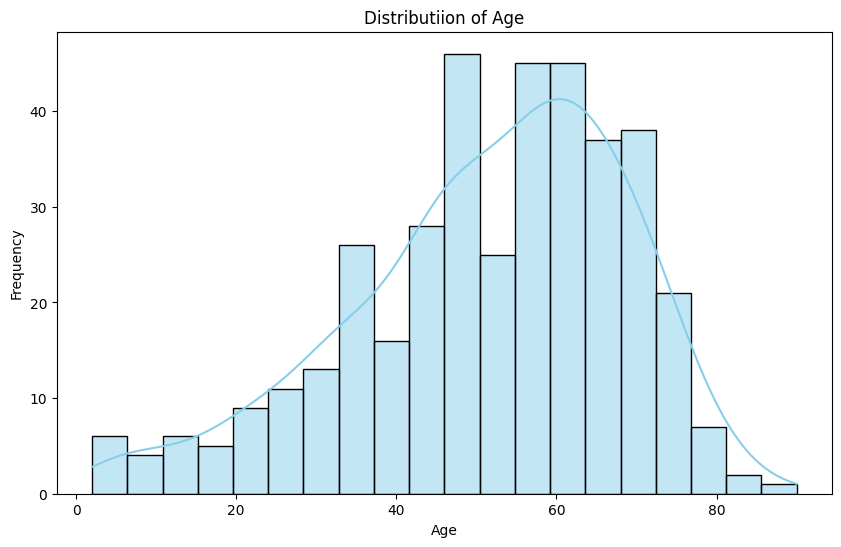

In [57]:
# lets try to do univariate analysis >> one feature at a time
plt.figure(figsize = (10, 6))
sns.histplot(df['age'].dropna(), kde = True, bins = 20, color = 'skyblue')
plt.title('Distributiion of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# insights >> this data is some extent actually to skewed, skewed data
# age is left skewed data

In [58]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='hypertension', ylabel='count'>

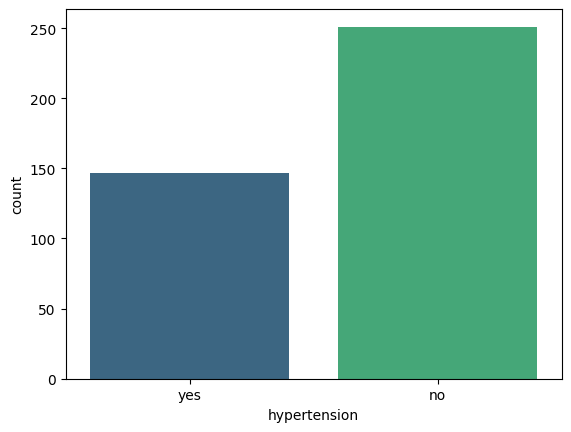

In [59]:
# count of hyper tension
sns.countplot(x = 'hypertension', data = df, palette = 'viridis')

In [60]:
# insights >> 150 of them has hyper tension

In [61]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='class', ylabel='blood_urea'>

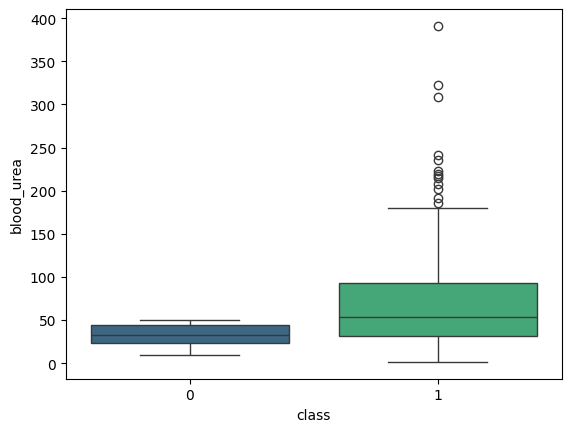

In [62]:
# we can have multiple plot
sns.boxplot(x = 'class', y = 'blood_urea', data = df, palette = 'viridis')

In [ ]:
# insights >> people with kidney disease has higher blood urea with outliers , median value is higher

<Axes: xlabel='class', ylabel='serum_creatinine'>

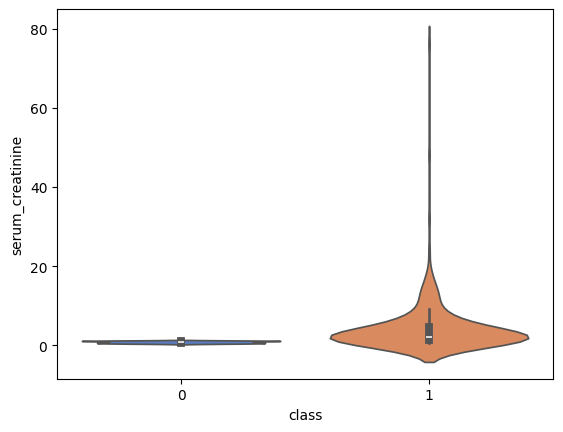

In [64]:
sns.violinplot(x = 'class', y = 'serum_creatinine', data = df, palette = 'muted')

In [ ]:
# longer tail means outlier

In [65]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='aanemia', ylabel='count'>

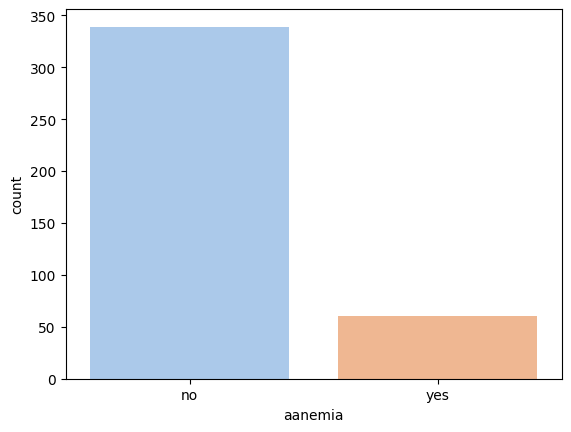

In [68]:
sns.countplot(x = 'aanemia', data = df, palette = 'pastel')

In [ ]:
# insights >> majority of the people not suffering from aanemia

In [69]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [71]:
df.appetite.value_counts()

,count
appetite,
good,317
poor,82


<Axes: ylabel='count'>

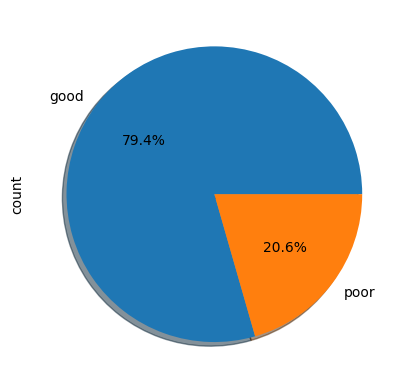

In [77]:
df.appetite.value_counts().plot.pie(autopct = "%1.1f%%", shadow = True)

([<matplotlib.patches.Wedge at 0x7e398a8d8710>,
 [Text(-0.8785859447590888, 0.6618812111487828, 'good'),
  Text(0.8785859757439837, -0.6618811700192054, 'poor')],
 [Text(-0.4792286971413211, 0.36102611517206334, '79.4%'),
  Text(0.4792287140421729, -0.3610260927377484, '20.6%')])

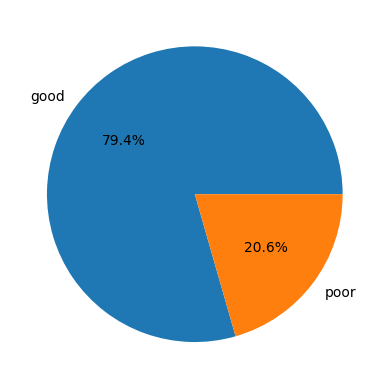

In [76]:
plt.pie(df.appetite.value_counts(), labels = df.appetite.value_counts().index, autopct = "%1.1f%%")

<Axes: ylabel='count'>

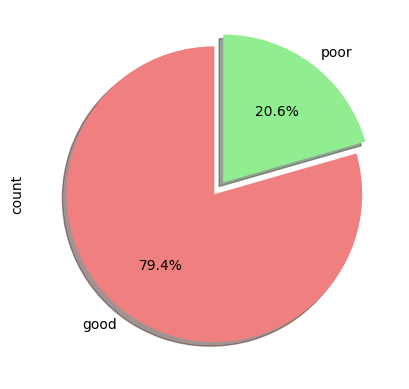

In [81]:
df.appetite.value_counts().plot.pie(autopct = "%1.1f%%", colors = ['lightcoral', 'lightgreen'], shadow = True, explode = (0, 0.1), startangle = 90)

In [82]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [84]:
df.pus_cell_clumps

,pus_cell_clumps
0,notpresent
1,notpresent
2,notpresent
3,present
4,notpresent
...,...
395,notpresent
396,notpresent
397,notpresent
398,notpresent


<Axes: xlabel='pus_cell_clumps', ylabel='count'>

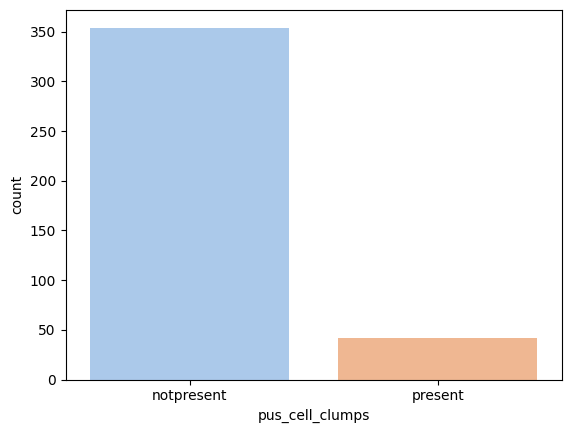

In [85]:
sns.countplot(x = 'pus_cell_clumps', data = df, palette = 'pastel')

In [ ]:
# insight

In [86]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [87]:
# lets make a distribution plot of white blood cell counts

<Axes: xlabel='white_blood_cell_count', ylabel='Count'>

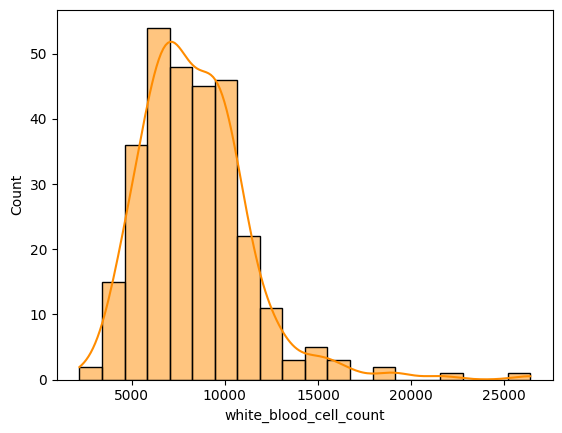

In [89]:
sns.histplot(df['white_blood_cell_count'].dropna(), bins = 20, kde = True, color = 'darkorange')

In [ ]:
# insights

In [ ]:
# lets make a donut plot or chart
# is is also known as donut or ring chart
# it is essentially a pie chart with a whole in the center
# by specifying wedgeprops value

In [ ]:
# used to display proportions

<Axes: ylabel='count'>

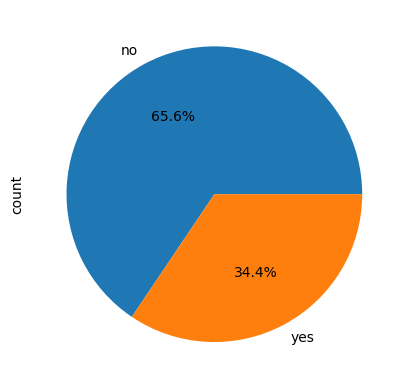

In [90]:
df['diabetes_mellitus'].value_counts().plot.pie(autopct = "%1.1f%%")

<Axes: ylabel='count'>

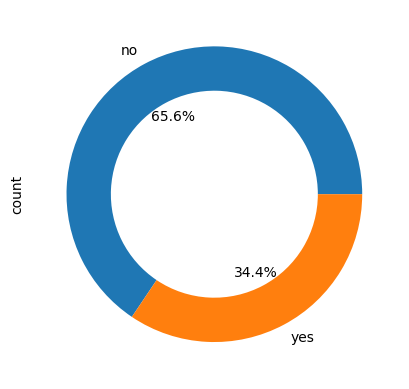

In [91]:
df['diabetes_mellitus'].value_counts().plot.pie(autopct = "%1.1f%%", wedgeprops = dict(width = 0.3))

In [ ]:
# this is the donut plot

In [92]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='coronary_artery_disease', ylabel='count'>

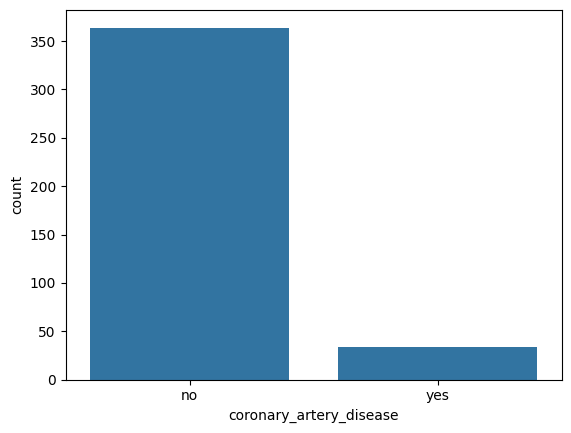

In [93]:
sns.countplot(x = 'coronary_artery_disease', data = df)

In [94]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='peda_edema', ylabel='count'>

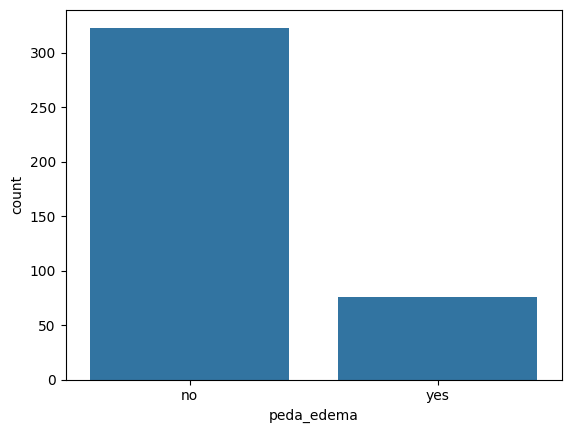

In [95]:
sns.countplot(x = 'peda_edema', data = df)

<Axes: xlabel='bacteria', ylabel='count'>

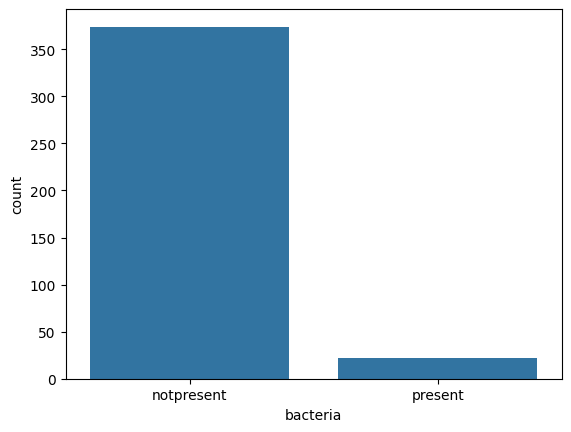

In [96]:
sns.countplot(x = 'bacteria', data = df)

In [97]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [ ]:
# this was till now was about univariate analysis

In [98]:
# Now bivariate analysis

<Axes: xlabel='age', ylabel='blood_pressure'>

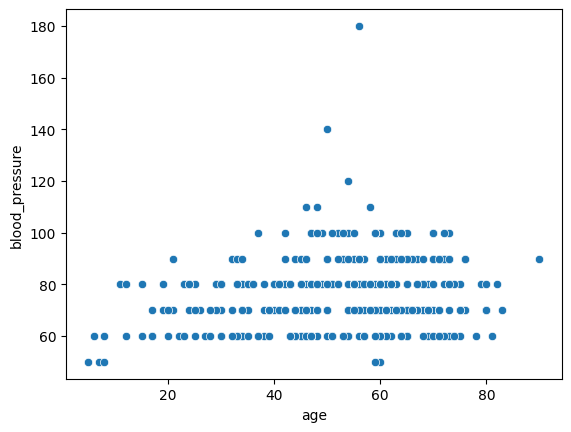

In [99]:
sns.scatterplot(x = 'age', y = 'blood_pressure', data = df)

In [ ]:
# insights >> as age is increasing bp is also increasing

In [ ]:
# What are the people suffering from chronic disease and what are not ?

<Axes: xlabel='age', ylabel='blood_pressure'>

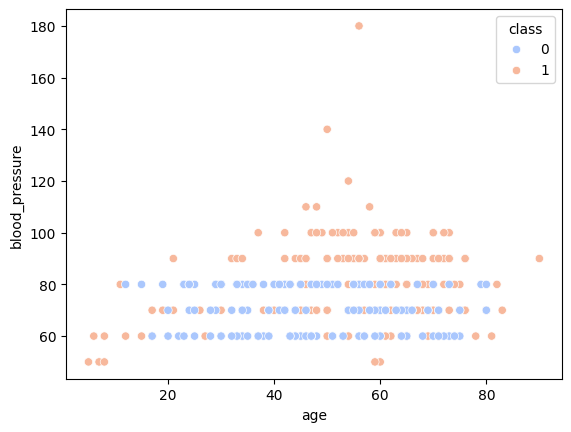

In [101]:
sns.scatterplot(x = 'age', y = 'blood_pressure', data = df, hue = 'class', palette = 'coolwarm')

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

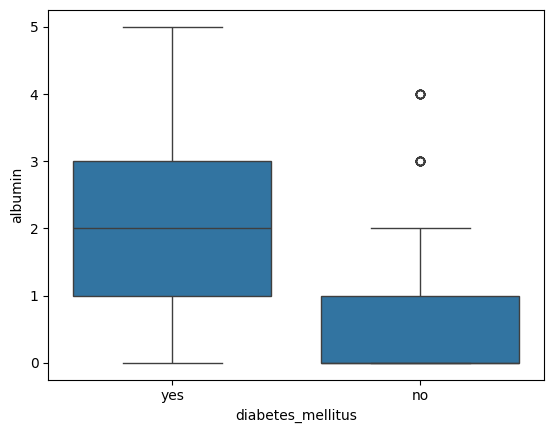

In [102]:
sns.boxplot(x = 'diabetes_mellitus', y = 'albumin', data = df)

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

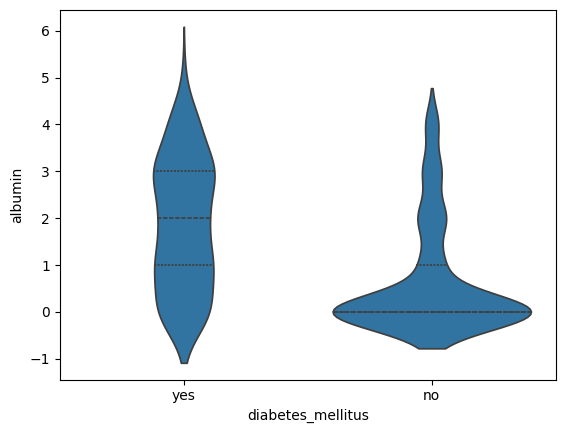

In [106]:
sns.violinplot(x = 'diabetes_mellitus', y = 'albumin', data = df, inner = 'quartile')

In [107]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [106]:
# stacked bar chart
# in which featere >> diabetes mellitus and hyper tension

In [112]:
df['diabetes_mellitus']
df['hypertension']

,hypertension
0,yes
1,no
2,no
3,yes
4,no
...,...
395,no
396,no
397,no
398,no


In [114]:
pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
# cross tab summaries the data

hypertension,no,yes
diabetes_mellitus,,
no,220,41
yes,31,106


<Axes: xlabel='diabetes_mellitus'>

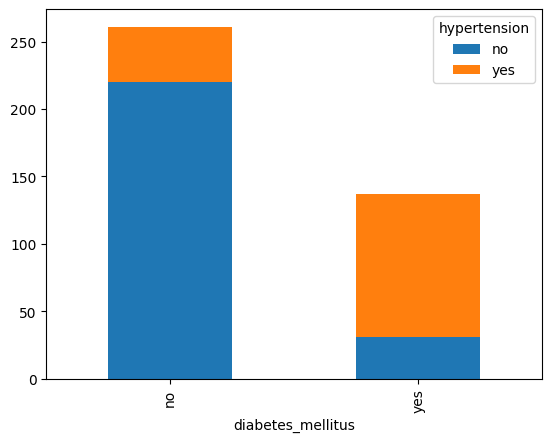

In [116]:
# stacked bar chart means stacked >> one upon one
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension.plot(kind = 'bar', stacked = True)

In [117]:
# multivariate analysis

In [120]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [121]:
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']

In [122]:
df[cols]

,age,blood_pressure,blood_glucose_random,serum_creatinine,class
0,48.0,80.0,121.0,1.2,1
1,7.0,50.0,NaN,0.8,1
2,62.0,80.0,423.0,1.8,1
3,48.0,70.0,117.0,3.8,1
4,51.0,80.0,106.0,1.4,1
...,...,...,...,...,...
395,55.0,80.0,140.0,0.5,0
396,42.0,70.0,75.0,1.2,0
397,12.0,80.0,100.0,0.6,0
398,17.0,60.0,114.0,1.0,0


In [ ]:
# this is called as multivariate analysis

In [ ]:
# pair plot making

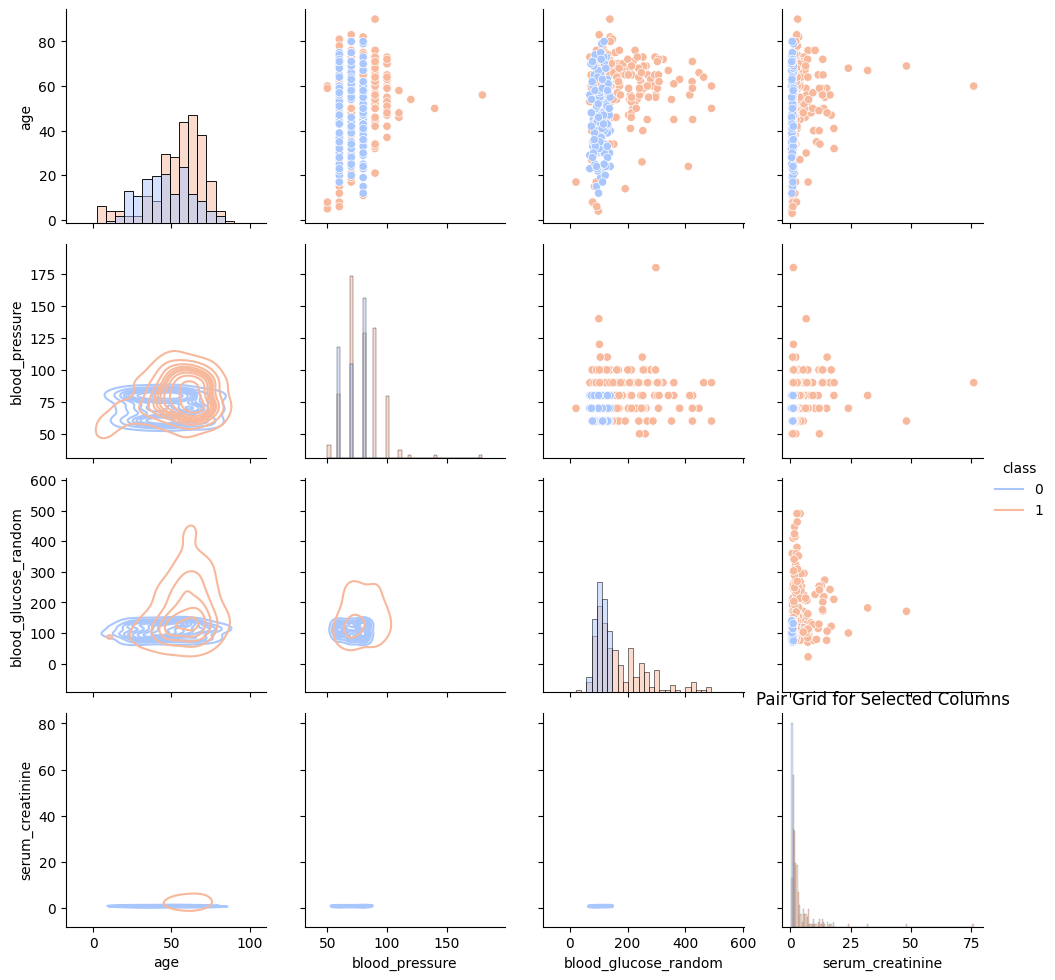

In [125]:
g = sns.PairGrid(df[cols], hue = 'class', palette = 'coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title('Pair Grid for Selected Columns')
plt.show()

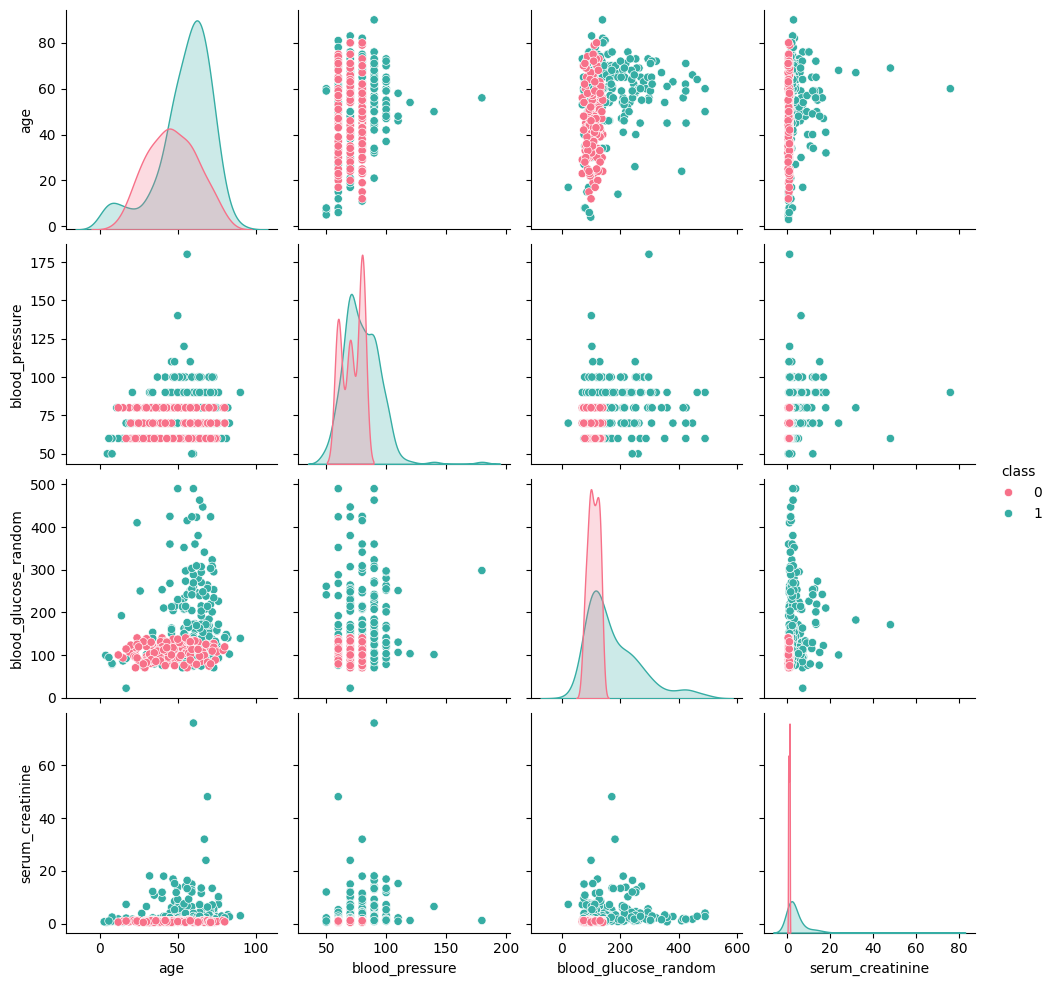

In [127]:
# you can also make a simple apir plot
sns.pairplot(df[cols], hue = 'class', palette = 'husl')

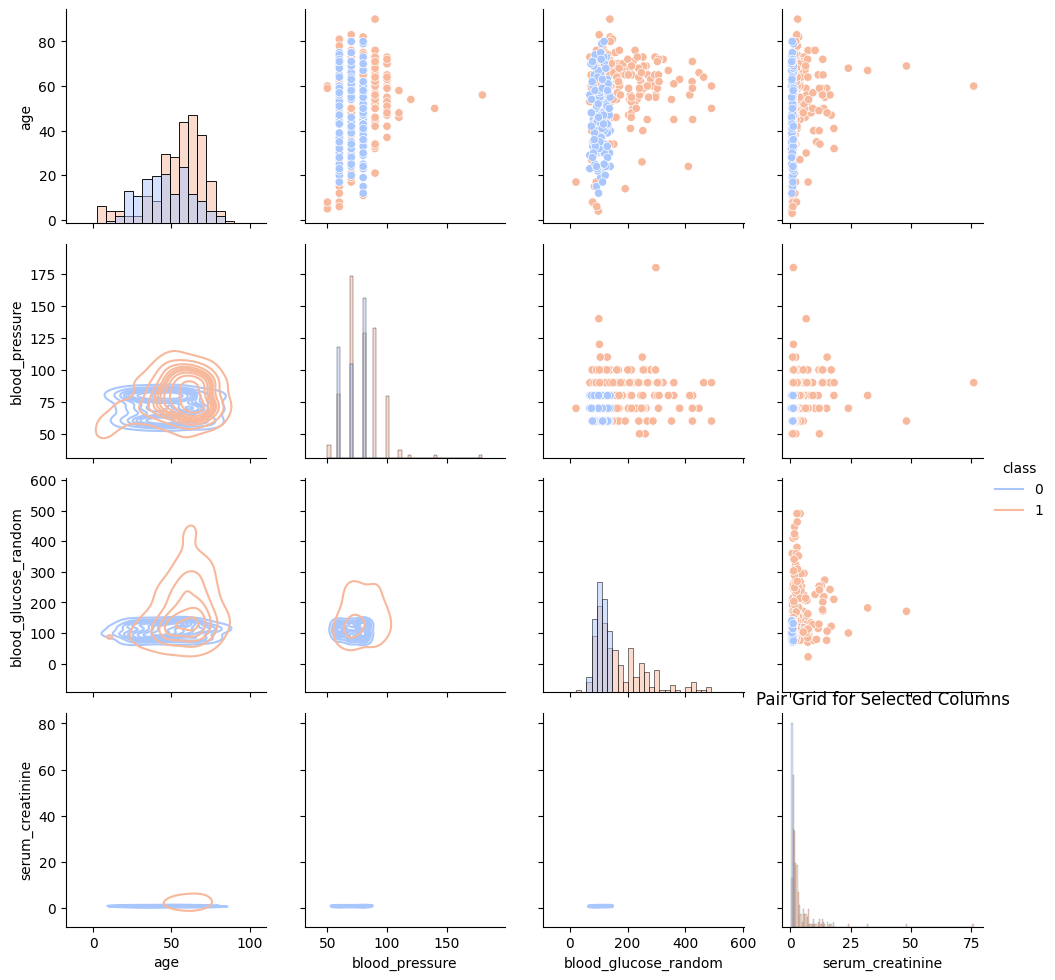

In [128]:
# customized pair plot
g = sns.PairGrid(df[cols], hue = 'class', palette = 'coolwarm')
g.map_upper(sns.scatterplot) # upper corner plot
g.map_lower(sns.kdeplot, cmap = 'Blues_d') # lower corner plot
g.map_diag(sns.histplot) # diagonal plot
g.add_legend()
plt.title('Pair Grid for Selected Columns')
plt.show()

In [129]:
# moving ahead

In [ ]:
# Start looking at correlation

In [130]:
df.corr(numeric_only = True)

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,0.227268
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,0.294077
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,-0.732163
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,0.627090
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,0.344070
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,0.419672
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,0.380605
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,0.299969
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,-0.375674
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,0.084541


<Axes: >

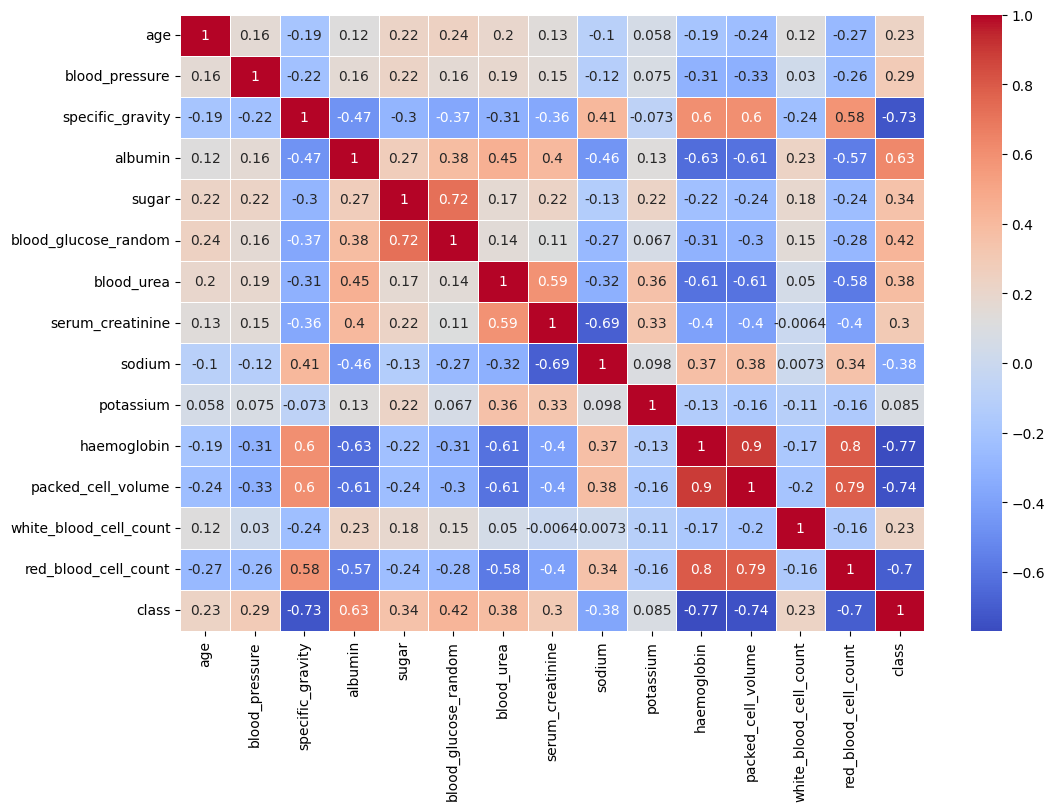

In [134]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = 0.5)

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

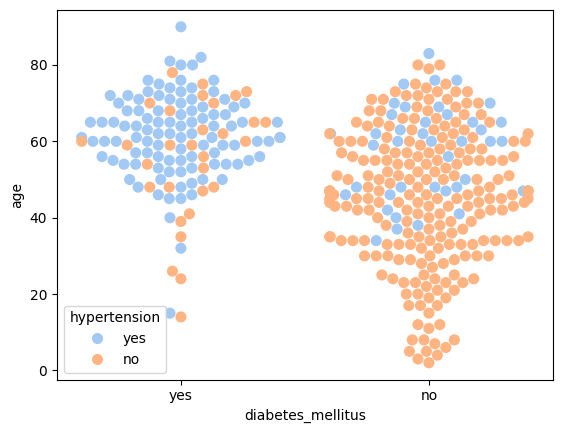

In [136]:
sns.swarmplot(x = 'diabetes_mellitus', y = 'age', hue = 'hypertension', data = df, palette = 'pastel', size = 8)

In [138]:
# what is swarm plot and what is the difference between swarm plot and scatter plot ?

In [139]:
# in scatterplot if the values are overlapping then you will not be able to find it
# but in swarm plot all the distributed values are look clear and clean

In [140]:
# swarm plot actulally helps you to also know at the particular value what are the other values ?

In [ ]:
# swarm plot allows you to see all the overlapping data as well

In [141]:
# lets make interactive scatter plot using plotly

In [142]:
fig = px.scatter(df, x = 'age', y = 'blood_pressure', color = 'class')
fig.show()

In [143]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [145]:
# now you also wants other information with this
fig = px.scatter(df, x = 'age', y = 'blood_pressure', color = 'class', hover_data= ['serum_creatinine', 'haemoglobin'], title = 'Interactive Scatter Plot')
fig.show()

In [146]:
# Lets try to make 3d plot

In [149]:
fig = px.scatter_3d(df, x = 'age', y = 'blood_pressure', z = 'serum_creatinine', color = 'class', title = '3D Scatter Plot')
fig.show()

In [ ]:
# interactive heatmap

In [152]:
import plotly.graph_objects as go
corr = df.corr(numeric_only = True)
fig = go.Figure(data = go.Heatmap(z = corr.values, x = corr.columns, y = corr.index))
fig.show()

In [153]:
# again you want to make a 3d chart
fig = px.scatter_3d(df, x = 'age', y = 'blood_pressure', z = 'serum_creatinine', color = 'haemoglobin', title = '3D Scatter Plot')
fig.show()

In [ ]:
# This was all about EDA

In [154]:
# Data Preparation
df.isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
blood_glucose_random,44


In [156]:
cat_col

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [158]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [ ]:
# replace with median, mean for numerical column

In [161]:
median_values = df[num_col].median()
median_values

,0
age,55.00
blood_pressure,80.00
specific_gravity,1.02
albumin,0.00
sugar,0.00
blood_glucose_random,121.00
blood_urea,42.00
serum_creatinine,1.30
sodium,138.00
potassium,4.40


In [162]:
df[num_col] = df[num_col].fillna(median_values)

In [163]:
df[num_col].isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [166]:
mode_values = df.mode().iloc[0]

In [167]:
df[cat_col] = df[cat_col].fillna(mode_values)

In [168]:
df[cat_col].isnull().sum()

,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
peda_edema,0
aanemia,0


In [169]:
df.dtypes

,0
age,float64
blood_pressure,float64
specific_gravity,float64
albumin,float64
sugar,float64
red_blood_cells,object
pus_cell,object
pus_cell_clumps,object
bacteria,object
blood_glucose_random,float64


In [171]:
# few columns are object columns >> convert object to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in cat_col:
  df[col] = label_encoder.fit_transform(df[col])

In [172]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [173]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [174]:
df.dtypes

,0
age,float64
blood_pressure,float64
specific_gravity,float64
albumin,float64
sugar,float64
red_blood_cells,int64
pus_cell,int64
pus_cell_clumps,int64
bacteria,int64
blood_glucose_random,float64


In [175]:
# There is no object column, everything has been converted into numerical column
# once it is converted into numerical column
# you can seperate x and y

In [177]:
X = df.drop('class', axis = 1) # X means independent feature
Y = df['class']

In [ ]:
# You you can convert it into ml model

In [178]:
# train test split and build the model